# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_4.1_4.2.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 4.1 and 4.2
# Benjamin Herrera
# 17 NOV 2024

# ⚠️ Run these commands prior to running anything

In [2]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install networkx

## 🤓☝️ Introduction

We use networks everyday! For example, you're probably reviewing this HW on the ASU's network which is connected to ASU's contracted ISP (probably Cox) which is then connected to the whole internet. The way that you queried GitHub to pull data about this notebook used a whole series of networks from Microsoft, to some ISP, to ASU, and then finally to you. One way we can graph this whole interaction is with graphs! No that this graph 📉. I'm talking about the graphs with nodes and edges; you know, the stuff we learned in CSE 310, MAT 243, or MAT 300. We call the study of graphs as graph theory. In graph theory, we can group a set of nodes and their edges into something called a cluster. For example, if we want to represent each rack of hardware compute in Microsoft's Azure as a node, then we can "cluster" all of these racks of hardware into a one cluster. 

Quoting from the chapter, we can mathematically represent a graph of nodes and edges as: $G(N, E)$ where $N = \{n_1, n_2, \dots, n_i\}$ and represents the Nodes in the graph. Likewise, $E = \{e_1, e_2, \dots, e_i \}$ and represents the edges between nodes in the graph. For the edgess, a single edge is defined as $e_i = e(n_a, n_b)$ where edge $e_i$ represents a bidirectional connection between $n_a$ and $n_b$. If, however, the connection is unidirectional, then $e(n_a, n_b)$ is not the same $e(n_b, n_a)$. We can make a sequence of edges ($e_a, e_b, e_c, \dots, e_{\mu}$) as a path, so long the connection between the end part of an edge is present in the start part of the next edge. 

To easily represent connections in a graph, we can use an adjacency matrix of $n \times n$. If we have an edge of $e(a_n, a_b)$, then the value of row $a$ and col $b$ will be 1; else, 0. If we have a weight graph, a graph where edges have weights to it, we can replace the values of 0 and 1 with the weight values of the edges. We can also use a laplacian matrix to represent this as well. Quoting from the chapter, a single cell in the laplacian is defined as: 

$$L_{ab} = \begin{cases}\sum_b E_{ab}, & \text{if } a = b, \\ -E_{ab}, & \text{if } a \neq b \text{ \& } v_a \text{ is adjacent to } v_b, \\ 0, & \text{else} \end{cases}$$

This Laplacian does have some properties to keep in mind (Quoting from the chapter):

1. If we define $V$ as $V_{aa} = \sum_{b}E_{ab}$, then $L = V - M$ where $M$ is the adjacency matrix.
2. $L$ can be calculated by multiplying the identity matrix of the graph by itself, transposed.
3. The eigenvalues of $L$ are in $\Reals$ and are positive. It also has $i$ numbers of orthogonal eigenvectors.
4. If $e$ is a vector of all 1s, then applying a linear transformation (while transposing $e$) results in a 0.
5. For very connected components in the graph, there is an eigenvalue of $L$ that is 0.
6. $x^TLx = \sum_{a, b \isin E} E_{ab}(x_a-x_b)^2$ where $x \isin \Reals^{|E|}$ and $E$ is the edge matrix
7. $(ax + be)^TL(ax+be) = a^2x^TLx$ where $a$ and $b$ are in $\Reals$ and $x \isin \Reals^{|E|}$.
8. $\min_{x \neq 0}x^TLx$ can be solved if $x$ is an eigenvector corresponding to the 2nd smallest eigenvalue.

Based off these properties and concepts about diagonalization (refer to HW 1.2 to 1.4), if we have a $n \times n$ matrix called $A$ and $A = PDP^-1$, then (quoting from the chapter):

$$\min_{x \neq 0, x \isin S} \frac{x^TAx}{x^Tx} = \lambda_a$$

where $S$ is all $x$ that are perpendicular to some eigenvector or when the dot product between an eigenvector and an $x$ equals to 0. Additionally, $\mu_a$ is an element in the diagonal of $D$. This is called the Courant-Fischer Theorem.

Let's try to make an example here! In this example, we'll try to replicate what could look like the Wikipedia document graph. Though, we'll use a random graph generation to simulate what this could look like. Here's an example of a simulated Wikipedia graph network with the `networkx` library:

> NOTE 📝: This is inspired from [this YouTube video](https://www.youtube.com/watch?v=JheGL6uSF-4)

In [8]:
# Import libraries as needed
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys

# Make some random bidirectional graph
G = nx.erdos_renyi_graph(n=69, p=0.05)

# Make an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Show the adjacency matrix
np.set_printoptions(threshold=sys.maxsize)
adj_matrix

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

> NOTE 📝: You may want to open the above output into some text editor to show the full adjacency matrix in its full glory 🤗

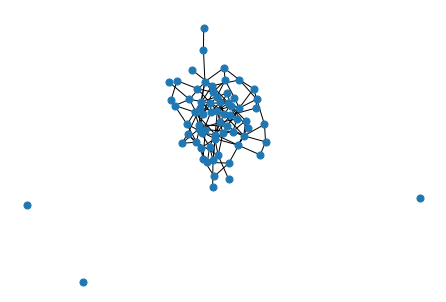

In [17]:
# Here's also the graph itself as well!
positions = nx.spring_layout(G)
nx.draw(G, positions, node_size=50)
plt.show()

Here, we can see a lot of the nodes connected together and even clustered. However, some nodes don't have any edges and are placed outside the cluster (NOTE 📝: this may change depending on the execution because there is a chance you may not have any nodes as described). Like the YouTube video I mentioned above, the outlier nodes here can represent documents from Wikipedia that have no links going to it or out of it. On the other hand, the majority of the documents are clustered together and have connections between each other.

## 📊🌈🍰 Spectral Graph Bipartitioning

A cut is defined as the splitting of a graph into two smaller graphs where the number of edges between the two separated graphs is minimized. In other words, how do we slice a graph where we can remove the least number of edges between the two selected graphs. In a binary edge graph, its pretty easy, just count the number of edges taken out and find the best action that minimizes the cut. For weight graphs, however, you have to be a little bit more selective. If we have two sets of nodes $N_1$ and $N_2$, we can define the cut as (quoting from the chapter):

$$cut(N_1, N_2) = \sum_{a \isin N_1, b \isin N_2}M_{ab}$$

When cutting to make multiple graphs, we have to change the definition into something like this (quoting from the chapter):

$$cut(N_1, N_2, \dots, N_c) = \sum_{a < b}cut(N_a, N_b)$$

Based off of this, we can define the Reyleigh Quotient. This is defined as (quoting from the chapter):

$$\frac{p^TLp}{p^Tp} = \frac{1}{n}\cdot 4 \cdot cut(N_1, N_2)$$

Where $L$ is the laplacian matrix of some graph $G$ and $p$ is a partition vector.

We can also define a ratio-cut where it is the normalization of two different cuts and combined together. Quoting from the chapter, it is defined as such:

$$RatioCut(N_1, N_2) = \frac{cut(N_1, N_2)}{|N_1|} + \frac{cut(N_1, N_2)}{|N_2|}$$

We can further normalize it via (quoting from the chapter):

$$NormalizedCut(N_1, N_2) = \frac{cut(N_1, N_2)}{\sum_{a\isin N_1} w_{aa}} + \frac{cut(N_1, N_2)}{\sum_{a\isin N_2} w_{aa}}$$